<h1>Modeling the Dust Extinction</h1>
<h2>Mean free path</h2>
The mean free path is the average distance over wich a particle travels before it changes its direction or energy: 

The probabilty that a particle colides with other within a volume of $L\times L\times dx$ is defined as:

$$ P(stop)=\frac{Area_{particles}}{Area_{total}}=\frac{\sigma n L^2 dx}{L^2}=n\sigma dx,$$
Where $n$ is the particle density and $\sigma$ is the effective cross section area of the particle.

The attenuation of the intensity of a bean of light equals to the original intencity times the probabilty of the bean to colide with a particle:
$$dI=-I\times P(stop)=-In\sigma dx$$
This is a differential equation with the next solution:
$$I=I_0 \exp(-x n\sigma)$$
Therefore the mean free path is:
$$\mathcal{l}=\frac{1}{n\sigma}$$

$$I=I_0 \exp\left(-\frac{x}{l}\right)$$

<h2>Example:</h2>

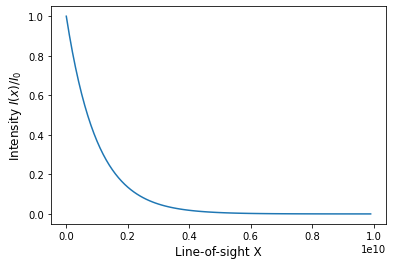

In [16]:
import numpy as np
import matplotlib.pyplot as plt
sigma=1e-4# 1 square micron
n=1e-5 #1x10^-5 particles in one cobic meter
l=1/(n*sigma)
x=np.arange(100)*1e8
I=np.exp(-x/l)
plt.ylabel(r'Intensity $I(x)/I_0$',fontsize=12)
plt.xlabel('Line-of-sight X',fontsize=12)
plt.plot(x,I)

<h2>The columnar density</h2>
The decaying intencity flux equation is:

$$I=I_0 \exp\left(-\frac{x}{l}\right)$$

$$I=I_0 \exp(-x\sigma n)$$

The term $x\sigma n$ represents the <b>bold optical depth </b>: $\tau=x\sigma n$, with $x$ the total distance of the line-of-sight, and therefore we can rewrite the past equation as:

$$I=I_0 \exp(-\tau)$$

For the case that $n$ changes with its position, we can rewrite the differential definition of the optical depth as:

$$d\tau=dx \sigma n,$$

and therefore the total optical depth is:

$$\tau=\sigma\int_0^R  n(x) dx$$

$$\tau=\sigma N_{dust}$$

where $N_{dust}=\int_0^R  n(x) dx$ is the <b>columnar density</b> of the dust.

<h2>Example</h2>

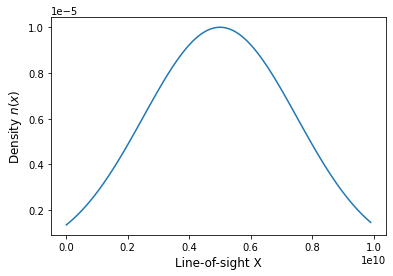

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(100)*1e8
#defining the dust density n as a Gaussian funtion

n=np.exp(-0.5*(x-50e8)**2./(25e8)**2)*1e-5

plt.ylabel(r'Density $n(x)$',fontsize=12)
plt.xlabel('Line-of-sight X',fontsize=12)
plt.plot(x,n)

In [19]:
def simpson_r(f,x,i1,i2,typ=0):
    n=(i2-i1)*1.0
    if n % 2:
        n=n+1.0
        i2=i2+1
    b=x[i2]
    a=x[i1]
    h=(b-a)/n
    s= f[i1]+f[i2]
    n=int(n)
    dx=b-a
    for i in range(1, n, 2):
        s += 4 * f[i1+i]
    for i in range(2, n-1, 2):
        s += 2 * f[i1+i]
    if typ == 0:
        return s*h/3.0
    if typ == 1:
        return s*h/3.0/dx
    
Nt=simpson_r(n,x,0,len(x)-2)
print('The columnar density is ',Nt,' particles per square meter')

The columnar density is  59521.19907342067  particles per square meter


In [22]:
tau=sigma*Nt
print('the optical depth is ',tau)

I=np.exp(-tau)
print('The total extintion is ',(1-I)*100,'%')

the total dust atenuation is  5.952119907342067
The total extintion is  99.73996777708412 %


<h2>The dust extintion attenuation</h2>

Going back to the decaying intencity flux equation:

$$I=I_0 \exp(-\tau)$$

We can change the equation in terms of magnitudes and rewrite the equation as:

$$m=-2.5\log_{10}I$$

$$m=-2.5\log_{10}\left( I_0\exp(-\tau)\right)$$

$$m=-2.5\log_{10} I_0 -2.5\frac{\tau}{\log(10)}$$

$$m=m_0 -\frac{\tau}{0.4\log(10)}$$

$$m=m_0 -A_{\tau}$$

Where $A_{\tau}=\frac{\tau}{0.4\log(10)}$ is the <b>dust extintion attenuation</b>

<h2>Example</h2>

In [23]:
At=tau/(0.4*np.log(10))
print('the total dust extintion atenuation is ',At, 'magnitudes')

the total dust extintion atenuation is  6.462432078462885 magnitudes


<h2>The dust extintion dependence with the wavelenght</h2>

The effective cross section of a dust particle can be defined as:

$$ \sigma=\pi*a^2\times Q_{ext},$$

with $a$ as the radiuss of the dust particle and $Q_{ext}$ is the efficiency factor for extintion and is defined as:

$$Q_{ext}=Q_{abs}+Q_{sca}$$

The $Q$ terms are complex mathematical terms but they can be modeled with the <b>Mie Aproximation </b>:

$$Q_{ext}=\frac{2\pi}{k a^2}\sum_{n=1}^{\inf}(2n+1)(|a_n|^2+|b_n|^2)\propto \lambda^{-1}$$

$$Q_{sca}=\frac{2\pi}{k a^2}\sum_{n=1}^{\inf}(2n+1)\mathcal{R}(a_n+b_n)\propto \lambda^{-4}$$

And therefore:

$$\sigma(\lambda)=\pi*a^2\times\left( \frac{C1}{\lambda}+\frac{C2}{\lambda^4}\right)$$

Finally, the total dust atenuation is:

$$A_{\lambda}=\frac{\tau(\lambda)}{0.4\log(10)}$$

$$A_{\lambda}=\frac{\sigma(\lambda) N_{dust}}{0.4\log(10)}$$

$$A_{\lambda}=\frac{\sigma(\lambda) \int_0^R  n(x) dx}{0.4\log(10)}$$


$$A_{\lambda,a}=\frac{\pi*a^2\times\left( \frac{C1}{\lambda}+\frac{C2}{\lambda^4}\right) \int_0^R  n_a(x) dx}{0.4\log(10)}$$

<h2>Example</h2>

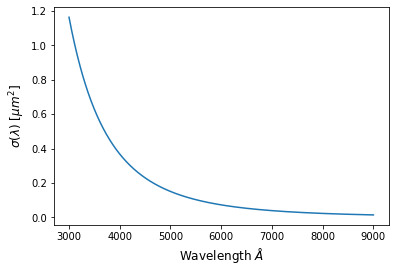

In [58]:
C1=2e-23
C2=3e-23
lamb=np.arange(1000)/999*(9000-3000)+3000 #wavelength in Angstroms
a=1e-4 #one micron of radius
sigma=np.pi*a**2*(C1/(lamb*1e-10)+C2/(lamb*1e-10)**4)

plt.ylabel(r'$\sigma(\lambda)$ [$\mu m ^2$]',fontsize=12)
plt.xlabel('Wavelength $\AA$',fontsize=12)
plt.plot(lamb,sigma/1e-4)

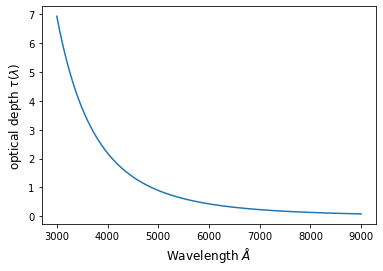

In [53]:
tau=sigma*Nt

plt.ylabel(r'optical depth $\tau(\lambda)$',fontsize=12)
plt.xlabel('Wavelength $\AA$',fontsize=12)
plt.plot(lamb,tau)

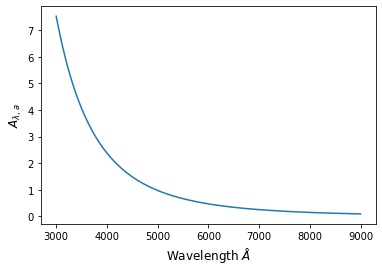

In [54]:
At=tau/(0.4*np.log(10))

plt.ylabel(r'$A_{\lambda,a}$',fontsize=12)
plt.xlabel('Wavelength $\AA$',fontsize=12)
plt.plot(lamb,At)

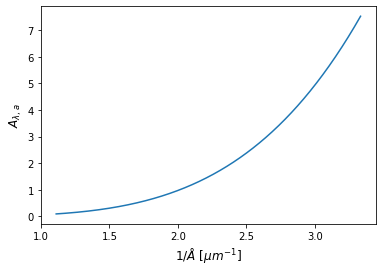

In [56]:
plt.ylabel(r'$A_{\lambda,a}$',fontsize=12)
plt.xlabel('$1/\AA$ [$\mu m^{-1}$]',fontsize=12)
plt.plot(1/(lamb*1e-4),At)

<h2>The total extintion curve</h2>

Finally, the total extinction curve takes into account the total dust extinction attenuations for all the dusts grains along the line of sight:

$$A_{\lambda}=\sum_a A_{\lambda,a}$$

<h2>Example</h2>

<h3> The Cardelli (1989) extintion law </h3>

![title](cardelli.png)

<h2>Bibliography</h2>

https://w.astro.berkeley.edu/~ay216/08/NOTES/Lecture05-08.pdf

https://ui.adsabs.harvard.edu/abs/1994ApJ...429..582C/abstract

https://ui.adsabs.harvard.edu/abs/1989ApJ...345..245C/abstract

http://www.astrosen.unam.mx/~aceves/verano/libros/harwit-astro-concepts.pdf

https://ned.ipac.caltech.edu/level5/Sept12/Calzetti/Calzetti1_4.html